# Predicting Fake Job Posts
Sam Lademan and Sam Rossi

# Introduction

For our end to end machine learning project, we decided to analyze a data set which contained several job postings. The data set in question contained fraudulent posts as well as genuine ones. As seniors who are beginning our post-college careers, it is important for us to avoid such fraudulent posts. So, we decided to build a project to help predict if a job posting is real or fake.
The input to our algorithm is a list of words found in job descriptions and titles. We then use different classification models, including a GaussianNB, a Support Vector Machine, BernoulliNB, and linear regression algorithm, to output how accurate the model is when making a prediction upon whether or not a job posting is fraudulent.

Dataset used: https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

# Related Work
Kaggle, where we found this data set, shows other works that individuals have done on each data set. For our data set, one specific user also created models to predict if a job posting was real or fake. For intial exploration of the data set, we used similar methods to this work as a full understanding of the data set was needed in both their and our experiments. This user applied a method of RandomOverSampling to attempt to balance the dataset, which we did not do. Additionally, they created models through use of a DecisionTreeClassifier and a RandomForestClassfier. Once again, we did not duplicate these methods, instead opting for other classification techniques.

Link to research: https://www.kaggle.com/niladri54/real-or-fake-job-prediction


# Initial Setup

In [1]:
from matplotlib import pyplot as plt
import seaborn as sea
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

#Read in data
df = pd.read_csv('fake_job_postings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Initial Exploration of Dataframe Contents

In this section, we list the top elements in several columns to try and gauge what we should be using for experimentation. Included here are sections we decided not to use later on, but were necessary to gain a full understanding of the data we were working with. 

In [2]:
display(df['requirements'].value_counts().head())

University degree required. TEFL / TESOL / CELTA or teaching experience preferred but not necessaryCanada/US passport holders only                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            410
University degree required. TEFL / TESOL / CELTA or teaching experience preferred but not necessaryPositive attitude required. Canada/US passport holders only                                                                                                                        

In [3]:
display(df['employment_type'].value_counts().head())

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [4]:
display(df['required_experience'].value_counts().head())

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Name: required_experience, dtype: int64

In [5]:
display(df['required_education'].value_counts().head())

Bachelor's Degree            5145
High School or equivalent    2080
Unspecified                  1397
Master's Degree               416
Associate Degree              274
Name: required_education, dtype: int64

In [6]:
display(df['industry'].value_counts().head(10))

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
Financial Services                      779
Hospital & Health Care                  497
Consumer Services                       358
Telecommunications                      342
Oil & Energy                            287
Name: industry, dtype: int64

# Feature Selection
For this process in our project, we opted to scale the dataframe down to only include elements which we deemed most important for predicting if a job post was fake. These features include: title, location, description, and has_company_logo.

In [7]:
df = df[['title', 'location', 'description', 'has_company_logo', 'fraudulent']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             17880 non-null  object
 1   location          17534 non-null  object
 2   description       17879 non-null  object
 3   has_company_logo  17880 non-null  int64 
 4   fraudulent        17880 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 698.6+ KB


# Visualization of Important Features

This section highlights a deeper dive into the feature we have selected for experimentation. Here, we utilized the Seaborn python library for better plot construction. Seaborn uses Matplotlib and expands it for more detailed plot creation and mapping. For example, we applied a Seaborn count plot to evaluate the correlation between a company having a logo on a job posting and a post being fake. Seaborn provided a more effective approach to graph creation, as we were able to focus more on the actual contents of the plot rather than drawing it.

<function matplotlib.pyplot.show(close=None, block=None)>

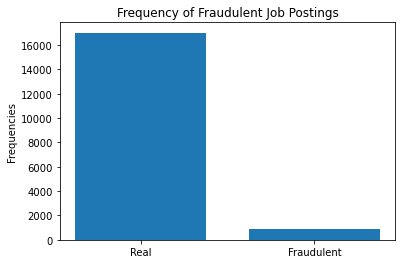

In [9]:
counts =df['fraudulent'].value_counts()

plt.bar(x=[0,.4], height = counts, width = .3)
plt.xticks([0,.4], ("Real", "Fraudulent"))
plt.ylabel('Frequencies')
plt.title('Frequency of Fraudulent Job Postings')
plt.show

This bar graph provides a visual summary of the dataset we are using to train our model. As you can see, the dataset has thoundsands of more real job postings than fraudulent job postings. This may lead to skewed data in the future.

Text(0.5, 1.0, 'Correlation Between Fraudulence and Having a Company Logo')

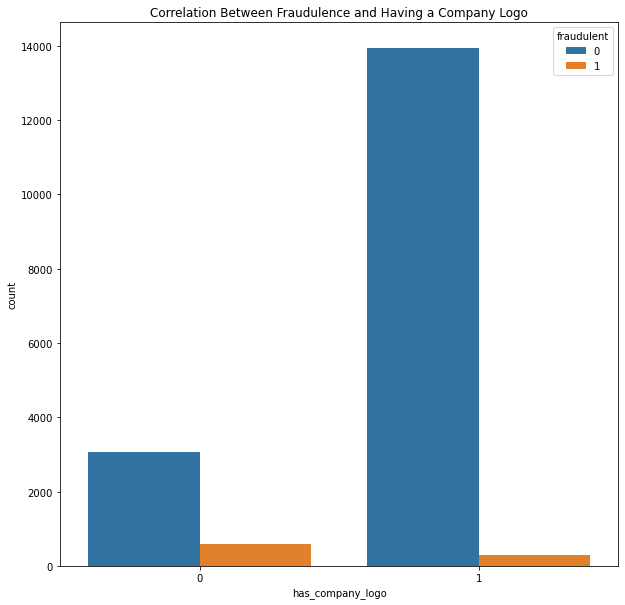

In [10]:
plt.figure(figsize=(10,10))
sea.countplot(x='has_company_logo', hue='fraudulent', data=df)
plt.title('Correlation Between Fraudulence and Having a Company Logo')

This plot demonstrates the correlation between a job posting having a company logo. As you can see, more job postings lacking a company logo are flagged as fraudulent than those containing a logo.

In [11]:
#Showing Top Job Titles in Dataframe
display(df['title'].value_counts().head(10))

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64

In [12]:
#Showing Top Locations in Dataframe
display(df['location'].value_counts().head(10))

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
US, TX, Houston          269
US, IL, Chicago          255
US, DC, Washington       251
DE, BE, Berlin           221
NZ, N, Auckland          218
Name: location, dtype: int64

In [13]:
#Showing Top Descriptions in Dataframe
display(df['description'].value_counts().head())

Play with kids, get paid for it Love travel? Jobs in Asia$1,500+ USD monthly ($200 Cost of living)Housing provided (Private/Furnished)Airfare ReimbursedExcellent for student loans/credit cardsGabriel Adkins : #URL_ed9094c60184b8a4975333957f05be37e69d3cdb68decc9dd9a4242733cfd7f7##URL_75db76d58f7994c7db24e8998c2fc953ab9a20ea9ac948b217693963f78d2e6b#12 month contract : Apply today                    379
Play with kids, get paid for it :-)Love travel? Jobs in Asia$1500 USD + monthly ($200 Cost of living)Housing providedAirfare ReimbursedExcellent for student loans/credit cardsGabriel Adkins : #URL_ed9094c60184b8a4975333957f05be37e69d3cdb68decc9dd9a4242733cfd7f7##URL_75db76d58f7994c7db24e8998c2fc953ab9a20ea9ac948b217693963f78d2e6b#                                                                     66
Play with kids, get paid for it Love travel? Jobs in Asia$1500 USD + monthly ($200 Cost of living)Excellent for student loans/credit cardsHousing provided (Furnished/Private)Airfare Reimbursed

We found this count verying interesting. The fact that there are repeated instances of the same job description word for word could be a potential idicator of fraud. This will be further explored through experimenting by using description to predict fraudulant job posts.

In [14]:
print(df.shape)

(17880, 5)


#  Creation of Training Set

In [15]:
df = df[['fraudulent', 'title']]
df.head()

,fraudulent,title
0,0,Marketing Intern
1,0,Customer Service - Cloud Video Production
2,0,Commissioning Machinery Assistant (CMA)
3,0,Account Executive - Washington DC
4,0,Bill Review Manager


In [16]:
dfTest = df.sample(frac=0.2, random_state=1)
dfTrain = df.drop(dfTest.index)

In [17]:
print(dfTest.shape)
print(dfTrain.shape)

(3576, 2)
(14304, 2)


# Checking for Null
Null values within the data set must be found to avoid unintended data manipulation.

In [18]:
dfTrain.isnull().values.any()

False

In [19]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14304 entries, 1 to 17879
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fraudulent  14304 non-null  int64 
 1   title       14304 non-null  object
dtypes: int64(1), object(1)
memory usage: 335.2+ KB


# Cleaning Data

In [20]:
dfTrainClean = dfTrain.copy()
dfTrainClean['title'] = dfTrainClean['title'].str.replace('\W+', ' ').str.replace('\s+', ' ').str.strip()
dfTrainClean['title'] = dfTrainClean['title'].str.lower()
dfTrainClean['title'] = dfTrainClean['title'].str.split()


dfTrainClean.head()

,fraudulent,title
1,0,"[customer, service, cloud, video, production]"
2,0,"[commissioning, machinery, assistant, cma]"
3,0,"[account, executive, washington, dc]"
7,0,"[lead, guest, service, specialist]"
8,0,"[hp, bsm, sme]"


# Creating a list of words that appear description

In [21]:
npWords = dfTrainClean.iloc[:,1].values
vocab = list(set(npWords.sum()))


In [22]:
df_vocab = pd.DataFrame([
    [row.count(word) for word in vocab]
    for row in dfTrainClean.iloc[:,1].values], columns=vocab)
df_vocab_train = df_vocab.copy()

df_vocab['fraudulent'] = dfTrainClean.loc[:,'fraudulent']
df_vocab_train.head()

,postgress,cpa,portals,limited,herculaneum,southend,creator,manage,costa,analytic,...,junction,citrix,integrated,abroad,6wf,seabourne,automated,fundraiser,hempstead,dialysis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from collections import Counter
Counter(dfTrainClean['fraudulent'])

Counter({0: 13591, 1: 713})

This counter describes how many positive, or fraudulant, cases there are. As you can see, the dataset is very imbalanced. A possible method to fixing this is through using random oversampling. This is when you add to the number of positive cases in order to make the dataset and therefore the training models umbiased. However, we were not able to get this working, as the imblearn class had issues. This is not the worst case scenario, though, as there are drawbacks with random oversampling. For instance, by adding artificial positive cases, even by using the k-nearest neighbor, the dataset becomes instantly false. No longer would we be observing real results, rather a hypothetical dataset. We were able to mitigate the dataset imbalance with built in algorithmic parameters,such as making the class_weight balanced.

# Training Data with Logistic Regression
Logistic regression is an algorithm used for classification problems. It is predicitive and is based off of probability.

In [24]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(df_vocab_train, dfTrainClean['fraudulent'])
pred = cross_val_predict(logreg,df_vocab_train, dfTrainClean['fraudulent'], cv=5)
score = cross_val_score(logreg,df_vocab_train, dfTrainClean['fraudulent'], cv=5)
avgLogReg = np.mean(score)

precLogReg = precision_score(dfTrainClean['fraudulent'], pred)
recallLogReg = recall_score(dfTrainClean['fraudulent'], pred)
print("Accuracy training logistic regression:", avgLogReg)
print("Precision: ", precLogReg)
print("Recall: ", recallLogReg)
confusion_matrix(dfTrainClean['fraudulent'], pred)

Accuracy training logistic regression: 0.8935950557656256
Precision:  0.2733893557422969
Recall:  0.6844319775596073


array([[12294,  1297],
       [  225,   488]], dtype=int64)

# Training Data with a GaussianNB model
Gaussian Naive Bayes is a varient of the naive bayes model. This model follows Gaussian normal distribution, which is a bell-shaped curve and assumes data will follow a normal distribution with an equal number of measurements above and below the mean.

In [25]:
gauss = GaussianNB()
gauss.fit(df_vocab_train, dfTrainClean['fraudulent'])
cv_pred = cross_val_predict(gauss, df_vocab_train, dfTrainClean['fraudulent'], cv=5)
#Upon testing with different hyperparameters, it is clear that having 5 folds in cross-validation yields optimal results
cv_score = cross_val_score(gauss, df_vocab_train, dfTrainClean['fraudulent'], cv=5)
avgGauss = np.mean(cv_score)

gauss_precision_score = precision_score(dfTrainClean['fraudulent'], cv_pred)
gauss_recall_score = recall_score(dfTrainClean['fraudulent'], cv_pred)
print("Accuracy training gaussian nb: ", avgGauss)
print("Precision score: ", gauss_precision_score)
print("Recall score: ", gauss_recall_score)
confusion_matrix(dfTrainClean['fraudulent'], cv_pred)

Accuracy training gaussian nb:  0.647650388758393
Precision score:  0.10016632785067456
Recall score:  0.7601683029453016


array([[8722, 4869],
       [ 171,  542]], dtype=int64)

# Training Data with a BernoulliNB model

Bernoulli naive bayes is a varient of the naive bayes model which shows the presence/absence of a feature.

In [26]:
bern = BernoulliNB()
bern.fit(df_vocab_train, dfTrainClean['fraudulent'])
cv_pred = cross_val_predict(bern, df_vocab_train, dfTrainClean['fraudulent'], cv=5)
cv_score = cross_val_score(bern, df_vocab_train, dfTrainClean['fraudulent'], cv=5)
avgBern = np.mean(cv_score)

bern_precision_score = precision_score(dfTrainClean['fraudulent'], cv_pred)
bern_recall_score = recall_score(dfTrainClean['fraudulent'], cv_pred)
print("Accuracy training bernoulli nb: ", avgBern)
print("Precision score: ", bern_precision_score)
print("Recall score: ", bern_recall_score)
confusion_matrix(dfTrainClean['fraudulent'], cv_pred)

Accuracy training bernoulli nb:  0.9443508431449711
Precision score:  0.3875338753387534
Recall score:  0.2005610098176718


array([[13365,   226],
       [  570,   143]], dtype=int64)

# Training Data with a SVM

Support vector machines are useful for classification problems due to their use of hyperplanes to separate data points, and their ability to disregard many outliers. 

In [27]:
svm = LinearSVC(C=4, class_weight='balanced')
svm.fit(df_vocab_train, dfTrainClean['fraudulent'])
pred = svm.predict(df_vocab_train)

avgSvm = svm.score(df_vocab_train, dfTrainClean['fraudulent'])
precSvm = precision_score(dfTrainClean['fraudulent'], pred)
recallSvm = recall_score(dfTrainClean['fraudulent'], pred)


print("SVM Accuracy score: ", avgSvm)
print("Precision: ", precSvm)
print("Recall: ", recallSvm)
confusion_matrix(dfTrainClean['fraudulent'], pred)



SVM Accuracy score:  0.9367309843400448
Precision:  0.43806451612903224
Recall:  0.9523141654978962


array([[12720,   871],
       [   34,   679]], dtype=int64)

# Discussion of Training Data
For all of our training models, we used cross-validation with 5 folds. Additionally each method was measured by accuracy, precision score, recall score, and included a confusion matrix.

In [28]:
#Creation of table to view results from training
data = [["Logistic Regression", avgLogReg, precLogReg, recallLogReg],
        ["GaussianNB", avgGauss, gauss_precision_score, gauss_recall_score],
        ["BernoulliNB", avgBern, bern_precision_score, bern_recall_score],
        ["SVM", avgSvm, precSvm, recallSvm]]
df_models = pd.DataFrame(data, columns = ["Model", "Accuracy", "Precision", "Recall"])

In [29]:
display(df_models)

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.893595,0.273389,0.684432
1,GaussianNB,0.647650,0.100166,0.760168
2,BernoulliNB,0.944351,0.387534,0.200561
3,SVM,0.936731,0.438065,0.952314


<function matplotlib.pyplot.show(close=None, block=None)>

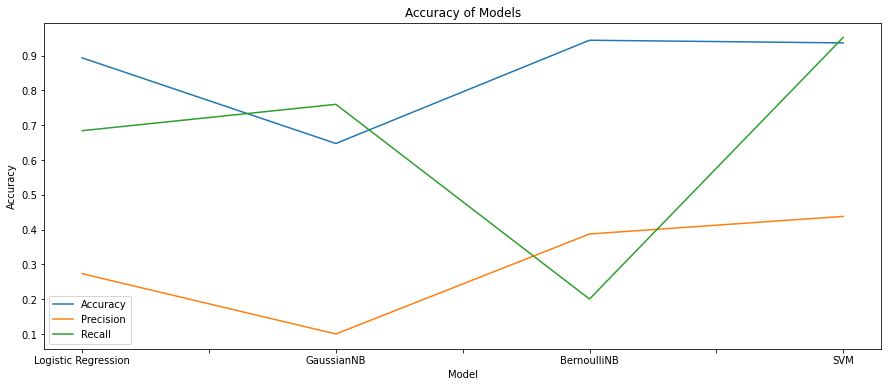

In [30]:
ax = plt.gca()
df_models.plot(title = "Accuracy of Models", kind = 'line', x = 'Model', y = "Accuracy",
              yticks = (0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1), figsize=(15,6), ax=ax)
df_models.plot(kind='line', x='Model', y = 'Precision', ax=ax)
df_models.plot(kind='line', x='Model', y='Recall', ax=ax)
plt.ylabel('Accuracy')
plt.legend()
plt.show

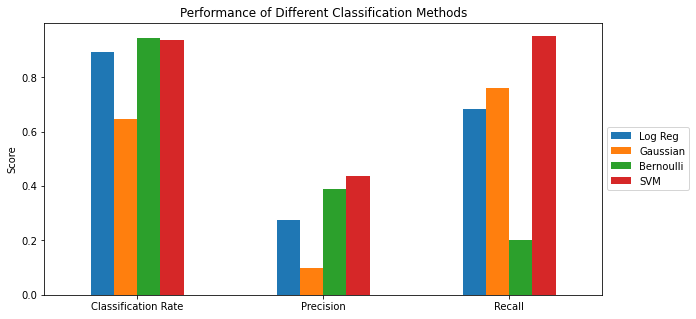

In [31]:
barData = [['Classification Rate', avgLogReg, avgGauss, avgBern, avgSvm],
           ['Precision', precLogReg, gauss_precision_score,bern_precision_score, precSvm],
           ['Recall',recallLogReg,gauss_recall_score, bern_recall_score, recallSvm]]
barDataDf = pd.DataFrame(barData)
barDataDf.columns = ['Accuracy Method', 'Log Reg', 'Gaussian', 'Bernoulli', 'SVM']
ax = barDataDf.plot.bar(x= 'Accuracy Method',rot = 0, title="Performance of Different Classification Methods", figsize = (10,5))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Score")
ax.set_xlabel("")
plt.show()

Overall, SVM seemed to be the highest performing method. It exceeded expecations in Classification Rate, and had the best recall by a significant margin. In this case, a higher recall is more desireable as we do not want legitimate job offerings to be marked as fraudulent. Log Reg performed in a similar fashion, but had lower precision and recall.
GaussianNB and BernoulliNB had identical precision and recall values, as both are based upon probability metrics. However, the BernoulliNB method appears more accurate due to its higher classification rate.
Finally, we elected to not use KNN as the data set we are dealing with is too large and this method would have been inefficient.

# Testing our Methods

In [32]:
df_test_clean = dfTest.copy()

df_test_clean['title'] = df_test_clean['title'].str.replace('\W+', ' ').str.replace('\s+', ' ').str.strip()
df_test_clean['title'] = df_test_clean['title'].str.lower()
df_test_clean['title'] = df_test_clean['title'].str.split()

df_test_clean.head()

,fraudulent,title
5736,0,"[jr, business, analyst, quality, analyst, entr..."
7106,0,"[english, teacher, abroad]"
11978,0,"[sql, server, database, developer, job, opport..."
9374,0,"[legal, analyst, 12, month, ftc]"
1300,0,"[part, time, finance, assistant]"


In [33]:
test_df_voc = pd.DataFrame([
    [row.count(word) for word in vocab]
    for row in df_test_clean.iloc[:,1].values], columns=vocab)
 

test_df_voc_train = test_df_voc.copy()

test_df_voc_train.head()

,postgress,cpa,portals,limited,herculaneum,southend,creator,manage,costa,analytic,...,junction,citrix,integrated,abroad,6wf,seabourne,automated,fundraiser,hempstead,dialysis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Test Data with Logistic Regression

In [34]:
logregTest = logreg.predict(test_df_voc_train)
logRegAvgClass = logreg.score(test_df_voc_train, df_test_clean['fraudulent'])

avgLogRegTest = np.mean(logRegAvgClass)

precLogRegTest = precision_score(df_test_clean['fraudulent'], logregTest, average='macro')
recallLogRegTest = recall_score(df_test_clean['fraudulent'], logregTest, average='macro')
print("Accuracy training logistic regression:", avgLogRegTest)
print("Precision: ", precLogRegTest)
print("Recall: ", recallLogRegTest)
confusion_matrix(df_test_clean['fraudulent'], logregTest)

Accuracy training logistic regression: 0.8982102908277405
Precision:  0.6170961148273487
Recall:  0.7969789142650925


array([[3107,  316],
       [  48,  105]], dtype=int64)

# Test Data With GaussianNB

In [35]:
gaussTest = gauss.predict(test_df_voc_train)
gaussAvgClass = gauss.score(test_df_voc_train, df_test_clean['fraudulent'])
avgGaussTest = np.mean(gaussAvgClass)

precGaussTest = precision_score(df_test_clean['fraudulent'], gaussTest, average='macro')
recallGaussTest = recall_score(df_test_clean['fraudulent'], gaussTest, average='macro')
print("Accuracy training gaussian nb:", avgGaussTest)
print("Precision: ", precGaussTest)
print("Recall: ", recallGaussTest)
confusion_matrix(df_test_clean['fraudulent'], gaussTest)

Accuracy training gaussian nb: 0.6364653243847874
Precision:  0.5377961179886902
Recall:  0.7195729007349361


array([[2152, 1271],
       [  29,  124]], dtype=int64)

# Test Data With BernoulliNB

In [36]:
bernTest = bern.predict(test_df_voc_train)
bernAvgClass = bern.score(test_df_voc_train, df_test_clean['fraudulent'])
avgBernTest = np.mean(bernAvgClass)

precBernTest = precision_score(df_test_clean['fraudulent'], bernTest, average='macro')
recallBernTest = recall_score(df_test_clean['fraudulent'], bernTest, average='macro')
print("Accuracy training gaussian nb:", avgBernTest)
print("Precision: ", precBernTest)
print("Recall: ", recallBernTest)
confusion_matrix(df_test_clean['fraudulent'], bernTest)

Accuracy training gaussian nb: 0.95917225950783
Precision:  0.7617610708206048
Recall:  0.6071672022592267


array([[3396,   27],
       [ 119,   34]], dtype=int64)

# Test Data with SVM 

In [37]:
svmTest = svm.predict(test_df_voc_train)
svmAvgClass = svm.score(test_df_voc_train, df_test_clean['fraudulent'])
avgSvmTest = np.mean(svmAvgClass)

precSvmTest = precision_score(df_test_clean['fraudulent'], svmTest, average='macro')
recallSvmTest = recall_score(df_test_clean['fraudulent'], svmTest, average='macro')

print("Accuracy training svm:", avgSvmTest)
print("Precision: ", precSvmTest)
print("Recall: ", recallSvmTest)
confusion_matrix(df_test_clean['fraudulent'], svmTest)

Accuracy training svm: 0.9010067114093959
Precision:  0.6208996424303712
Recall:  0.8015615244052632


array([[3116,  307],
       [  47,  106]], dtype=int64)

# Discussion of Test Results

In [38]:
#Table Creation
data = [["Logistic Regression", avgLogRegTest, precLogRegTest, recallLogRegTest],
        ["GaussianNB", avgGaussTest, precGaussTest, recallGaussTest],
        ["BernoulliNB", avgBernTest, precBernTest, recallBernTest],
        ["SVM", avgSvmTest, precSvmTest, recallSvmTest]]
df_models = pd.DataFrame(data, columns = ["Model", "Accuracy", "Precision", "Recall"])

In [39]:
display(df_models)

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.898210,0.617096,0.796979
1,GaussianNB,0.636465,0.537796,0.719573
2,BernoulliNB,0.959172,0.761761,0.607167
3,SVM,0.901007,0.620900,0.801562


<function matplotlib.pyplot.show(close=None, block=None)>

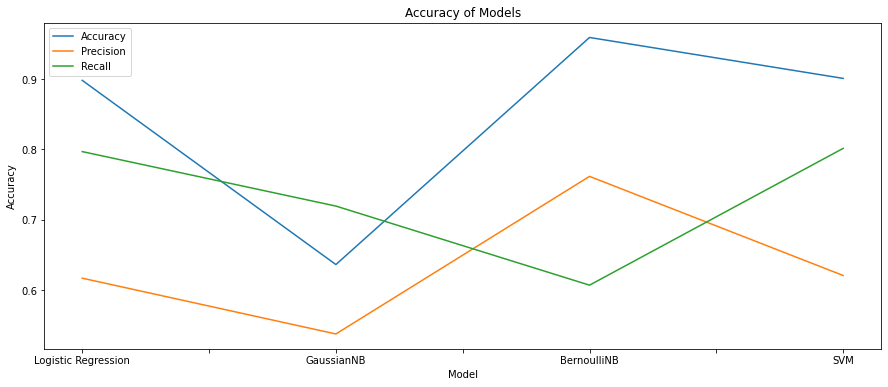

In [40]:
ax = plt.gca()
df_models.plot(title = "Accuracy of Models", kind = 'line', x = 'Model', y = "Accuracy",
              yticks = (0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1), figsize=(15,6), ax=ax)
df_models.plot(kind='line', x='Model', y = 'Precision', ax=ax)
df_models.plot(kind='line', x='Model', y='Recall', ax=ax)
plt.ylabel('Accuracy')
plt.legend()
plt.show

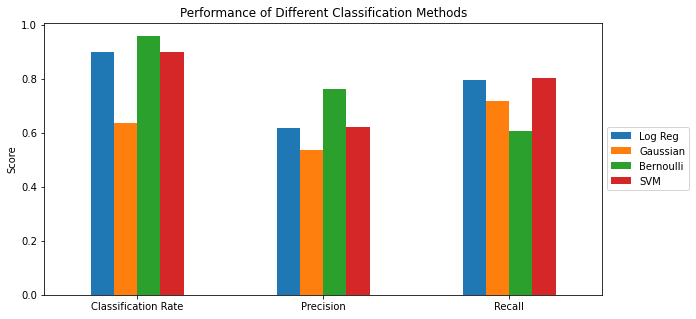

In [41]:
barData = [['Classification Rate', avgLogRegTest, avgGaussTest, avgBernTest, avgSvmTest],
           ['Precision', precLogRegTest, precGaussTest, precBernTest, precSvmTest],
           ['Recall',recallLogRegTest,recallGaussTest, recallBernTest, recallSvmTest]]
barDataDf = pd.DataFrame(barData)
barDataDf.columns = ['Accuracy Method', 'Log Reg', 'Gaussian', 'Bernoulli','SVM']
ax = barDataDf.plot.bar(x= 'Accuracy Method',rot = 0, title="Performance of Different Classification Methods", figsize = (10,5))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Score")
ax.set_xlabel("")
plt.show()

Our tests appear to perform well. For all four classifiers, classification stays relatively the same as the training set. Additionally, all four classifiers recive improvement in precision and recall. A potential cause for this increase is that the random sample used for testing may have included more fraudulent job postings than the training set, allowing more examples which yeilded better results. An additional cause for the increase in performance may have been that too much testing data was used. It may have also meant that our training data underfit our testing data. In general, using randomness to pick data points can affect results, so that may have been what occurred. 

# Conclusion

The goal of this project was to develop methods which could accurately predict if a job posting was real or fake. Overall, our project was hindered by that fact that only about 800 entries were considered fraudulent job posting out of over 18,000. This led to a rather unbalanced data set, and less reliable training and testing results. However, it is helpful to acknowledge that the classifiers did indeed work, just not to their fullest potential. The classification rates were mostly high, and the recall rates tended to be better than precision rates. In this case, that is beneficial, as we would prefer that there are more negatives. If a few fraudulent postings manage to slip through, that is acceptable. 
The Log Reg algorithim was by the highest performing with higher average performance values regarding the test data.
With this in mind, the best method to be used to predicted if a job post is real or fake would be using some form of a logarithmic regression model. Why is this? It is most likely due to its simplicity. It is not prone to overfitting, and does not make assumptions about the data. 

# Future Work
If we had the resources, we could expand the data set by including more instances of fraudulent job posts to better train the data. Additionally, we could use more categories to find better predictors of fake posts. There was also the issue of the ongoing struggle with computing power. We were completing this project on older laptops, not high function computational machines. There were many algorithms that may have had a higher success rate, but simply took too long to compute. An example of this is with the SVM classifier. We initially attempted to use a polynomial svm with a higher C value and more kernels, as this would make the trained classifier much more precise. However, it took 30 minutes to train once, and was not viable to include in the project. It did achieve great training results, with a recall and precision rate of over .9. With better machines, it is certain that this classifier would have been the most powerful. It is also possible, of course, that the model would have overfit the data. To find out would have taken immense power. Also, if we had additional team members, we may have found even more innovative ways to manipulate this data, whether that be through advanced graphs or unkown algorithms. We would love to explore these results with more user information. By this we mean, how many false postings did users click on? How many applied to the fraudulent postings. Knowing this information would be helpful to determine how much of an issue fraudulent job postings are currently. Also, if we were to compile this information over years, we may be able to predict how many of these postings will exist in the upcoming years. Maybe they increased during the pandemic, but will they increase in the future as well?

# Contributions
We worked together completely on each section of this project. This includes all forms of research, training and testing.